In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
import optuna

/home/vk9342/.conda/envs/usrp/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# True vs Predicted Plots

In [9]:
cosm_type = 'nwLH'
Pk_type = 'MPk'

if cosm_type == 'nwLH':
    num_params = 6
    param_names = [r'$\Omega_m$', r'$\Omega_b$', r'$h$', 
               r'$n_s$', r'$\sigma_8$', r'$M_{\nu}$', r'$w$']
    minimum = np.array([0.1, 0.02, 0.50, 0.80, 0.60, 0.01])
    maximum = np.array([0.5, 0.08, 0.90, 1.20, 1.00, 1.0])

elif cosm_type == 'LH':
    num_params = 5
    param_names = [r'$\Omega_m$', r'$\Omega_b$', r'$h$', 
               r'$n_s$', r'$\sigma_8$']
    minimum = np.array([0.1, 0.02, 0.50, 0.80, 0.60])
    maximum = np.array([0.5, 0.08, 0.90, 1.20, 1.00])

elif cosm_type == 'BSQ':
    num_params = 5
    param_names = [r'$\Omega_m$', r'$\Omega_b$', r'$h$', 
               r'$n_s$', r'$\sigma_8$']
    minimum = np.array([0.1, 0.02, 0.50, 0.80, 0.60])
    maximum = np.array([0.5, 0.08, 0.90, 1.20, 1.00])
    

# epochs = 'debug_final_out'
# epochs = '_1000_sigmoid'
# epochs = '_1000'
# epochs = 'fixed_final_5_debug_all_layers'
# epochs = 'transfer_5'
# epochs = 'fixed_final_5'
# epochs = '_transfer5_network1_v3'
# epochs = '_transfer5_network2'
# epochs = '_nwLH_only_v4'
# epochs = '_test_1hl_300'
# epochs = '_test_1hl_dynamic_epochs'
# epochs = '_fix_optunas'
epochs = 'transfer5_network2_w_log_test_final_layer_BSQ'

test = np.loadtxt('results/Results_test_'+str(Pk_type)+'_'+str(cosm_type)+'_params_'+str(epochs)+'.txt')
test_true = test[:, :num_params]     # First half (true values)
test_predicted = test[:, num_params:]  # Second half (predicted values)

train = np.loadtxt('results/Results_train_'+str(Pk_type)+'_'+str(cosm_type)+'_params_'+str(epochs)+'.txt')
train_true = train[:, :num_params]     # First half (true values)
train_predicted = train[:, num_params:]

valid = np.loadtxt('results/Results_valid_'+str(Pk_type)+'_'+str(cosm_type)+'_params_'+str(epochs)+'.txt')
valid_true = valid[:, :num_params]     # First half (true values)
valid_predicted = valid[:, num_params:]

# Reverse normalization for predictions
test_predicted = test_predicted * (maximum - minimum) + minimum
train_predicted = train_predicted * (maximum - minimum) + minimum
valid_predicted = valid_predicted * (maximum - minimum) + minimum

# Reverse normalization for true values
test_true = test_true * (maximum - minimum) + minimum
train_true = train_true * (maximum - minimum) + minimum
valid_true = valid_true * (maximum - minimum) + minimum

In [10]:
print(len(valid_true), len(valid_predicted))

300 300


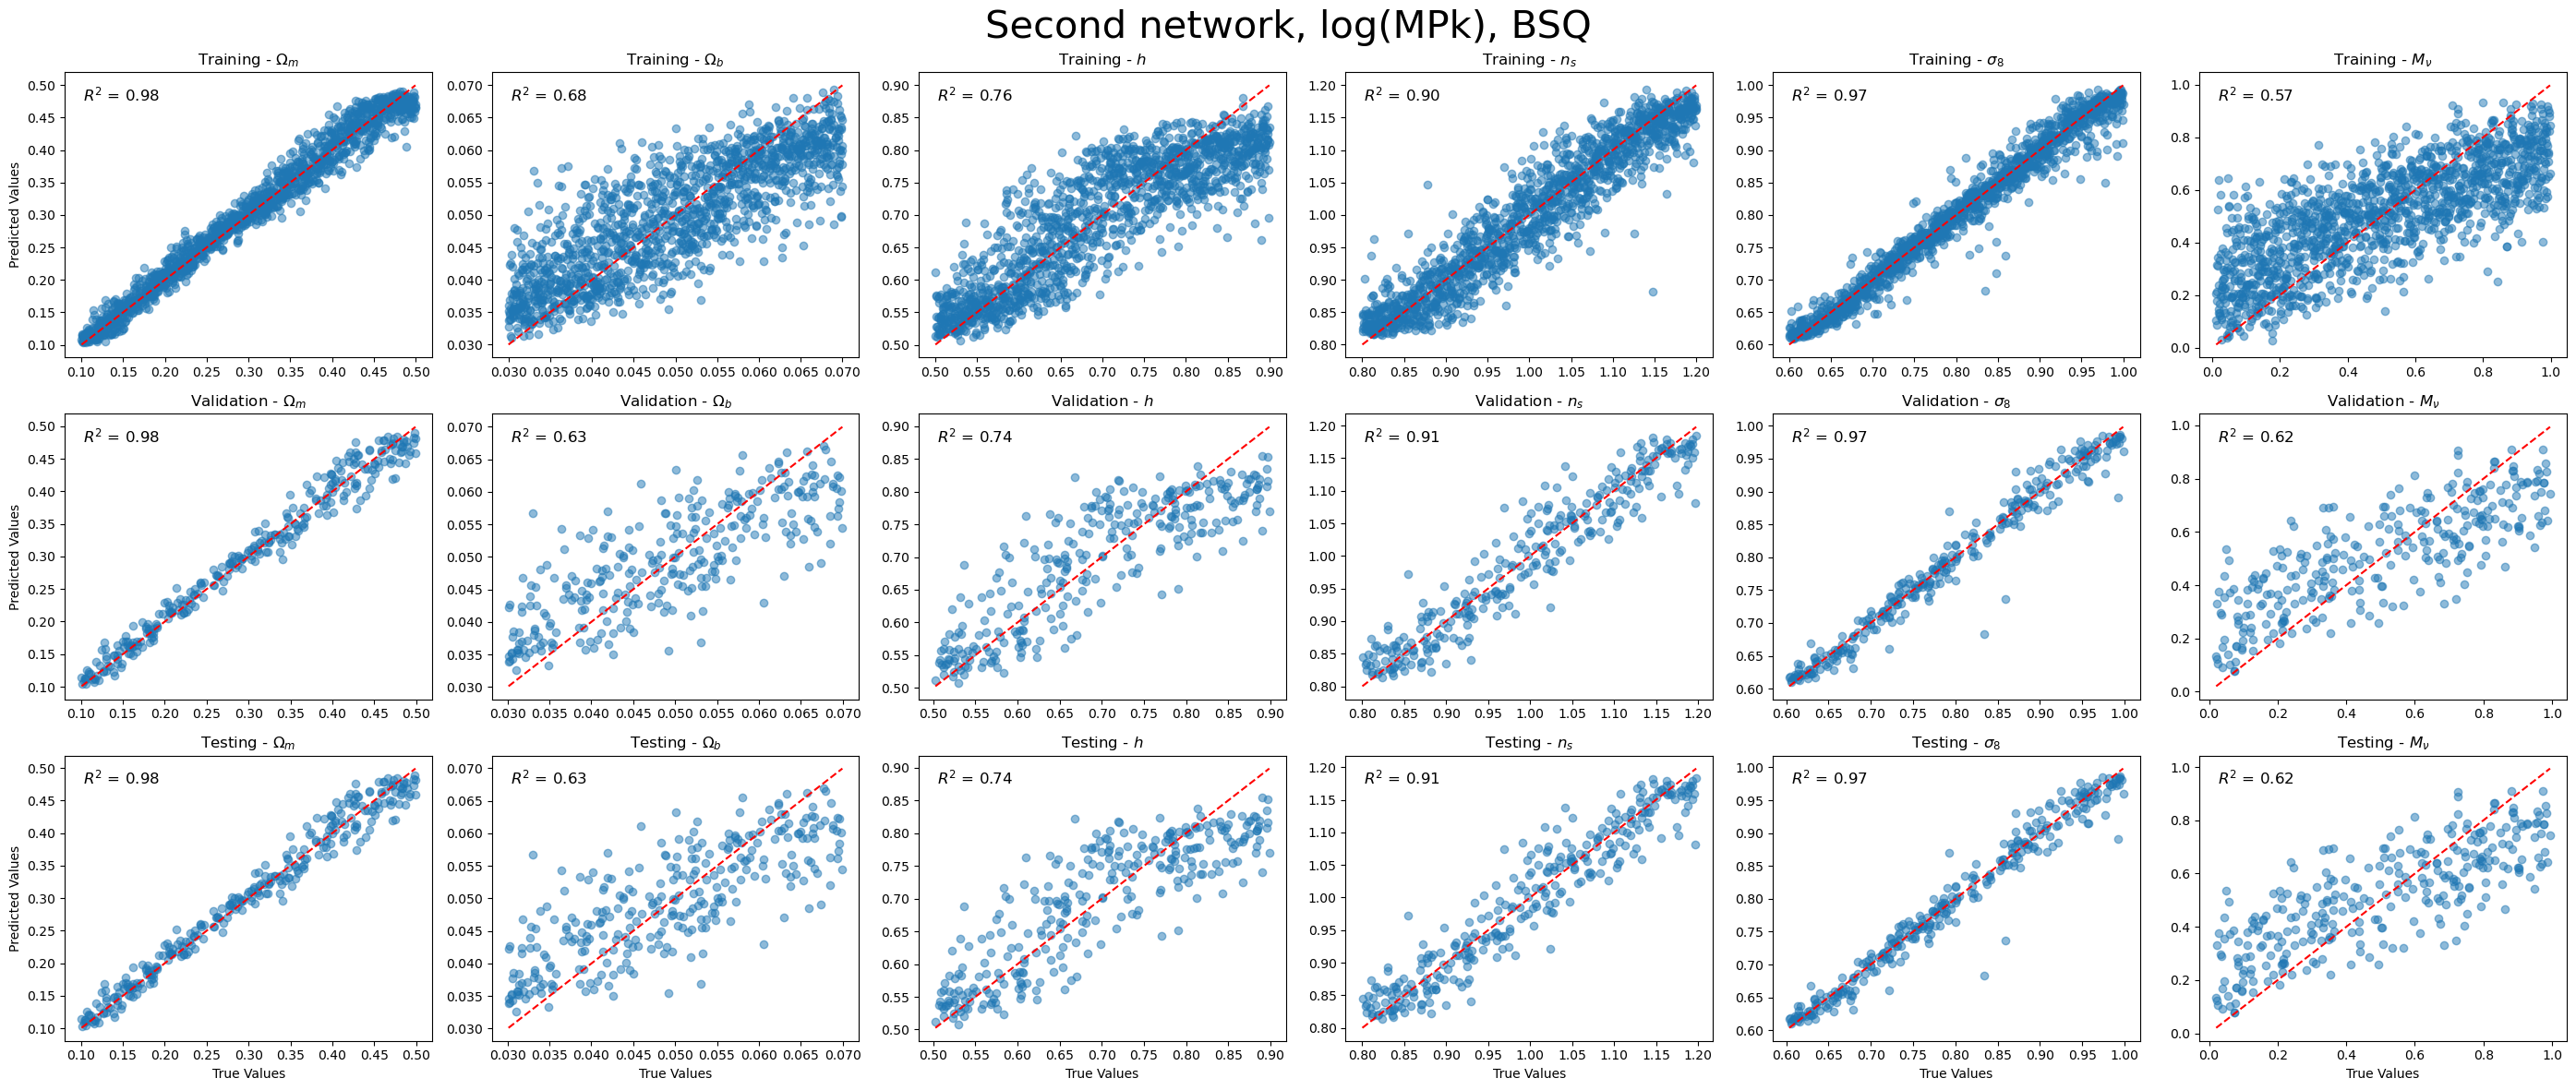

In [12]:

datasets = [('Training', train_predicted, train_true), 
            ('Validation', valid_predicted, valid_true), 
            ('Testing', test_predicted, test_true)]

fig, axes = plt.subplots(3, num_params, figsize=(28, 12))

for row, (dataset_name, preds, truths) in enumerate(datasets):
    for col in range(num_params):
        ax = axes[row, col]
        ax.scatter(truths[:, col], preds[:, col], alpha=0.5)
        ax.plot([truths[:, col].min(), truths[:, col].max()], [truths[:, col].min(), truths[:, col].max()], 'r--')
        ax.set_title(f'{dataset_name} - {param_names[col]}')
        axes[2][col].set_xlabel('True Values')
        axes[row][0].set_ylabel('Predicted Values')
        r2 = r2_score(truths[:, col], preds[:, col])
        ax.text(0.05, 0.9, f'$R^2$ = {r2:.2f}', transform=ax.transAxes, fontsize=12)
plt.suptitle('Second network, log(MPk), BSQ', size = 30)
plt.tight_layout()
plt.savefig('second_network_output_BSQ_MPk_w_log_final_layer.png')
plt.show()


# just plot all

In [3]:
cosm_type = 'BSQ'
if cosm_type == 'nwLH':
    num_params = 7
    pk_type = 'MPk_nwLH'
    param_names = [r'$\Omega_m$', r'$\Omega_b$', r'$h$', 
               r'$n_s$', r'$\sigma_8$', r'$M_{\nu}$', r'$w$']
    minimum = np.array([0.1, 0.03, 0.50, 0.80, 0.60, 0.01, -1.3])
    maximum = np.array([0.5, 0.07, 0.90, 1.20, 1.00, 1.0, -0.7])

elif cosm_type == 'LH':
    num_params = 5
    pk_type = 'MPk_LH'
    param_names = [r'$\Omega_m$', r'$\Omega_b$', r'$h$', 
               r'$n_s$', r'$\sigma_8$']
    minimum = np.array([0.1, 0.03, 0.50, 0.80, 0.60])
    maximum = np.array([0.5, 0.07, 0.90, 1.20, 1.00])

elif cosm_type == 'BSQ':
    num_params = 5
    param_names = [r'$\Omega_m$', r'$\Omega_b$', r'$h$', 
               r'$n_s$', r'$\sigma_8$']
    minimum = np.array([0.1, 0.02, 0.50, 0.80, 0.60])
    maximum = np.array([0.5, 0.08, 0.90, 1.20, 1.00])

epochs = 'fortransfer'
Pk_type = 'Pk'
mode = 'all'
# epoch = 'dynamic'
# epochs = 'transfer5_network2'

all = np.loadtxt('results/Results_'+mode+'_'+str(Pk_type)+'_'+str(cosm_type)+'_params_fortransfer.txt')
all_true = all[:, :num_params]     # First half (true values)
all_predicted = all[:, num_params:]  # Second half (predicted values)

# Reverse normalization for predictions
preds = all_predicted * (maximum - minimum) + minimum
preds = all_predicted
# Reverse normalization for true values
truths = all_true * (maximum - minimum) + minimum
truths = all_true

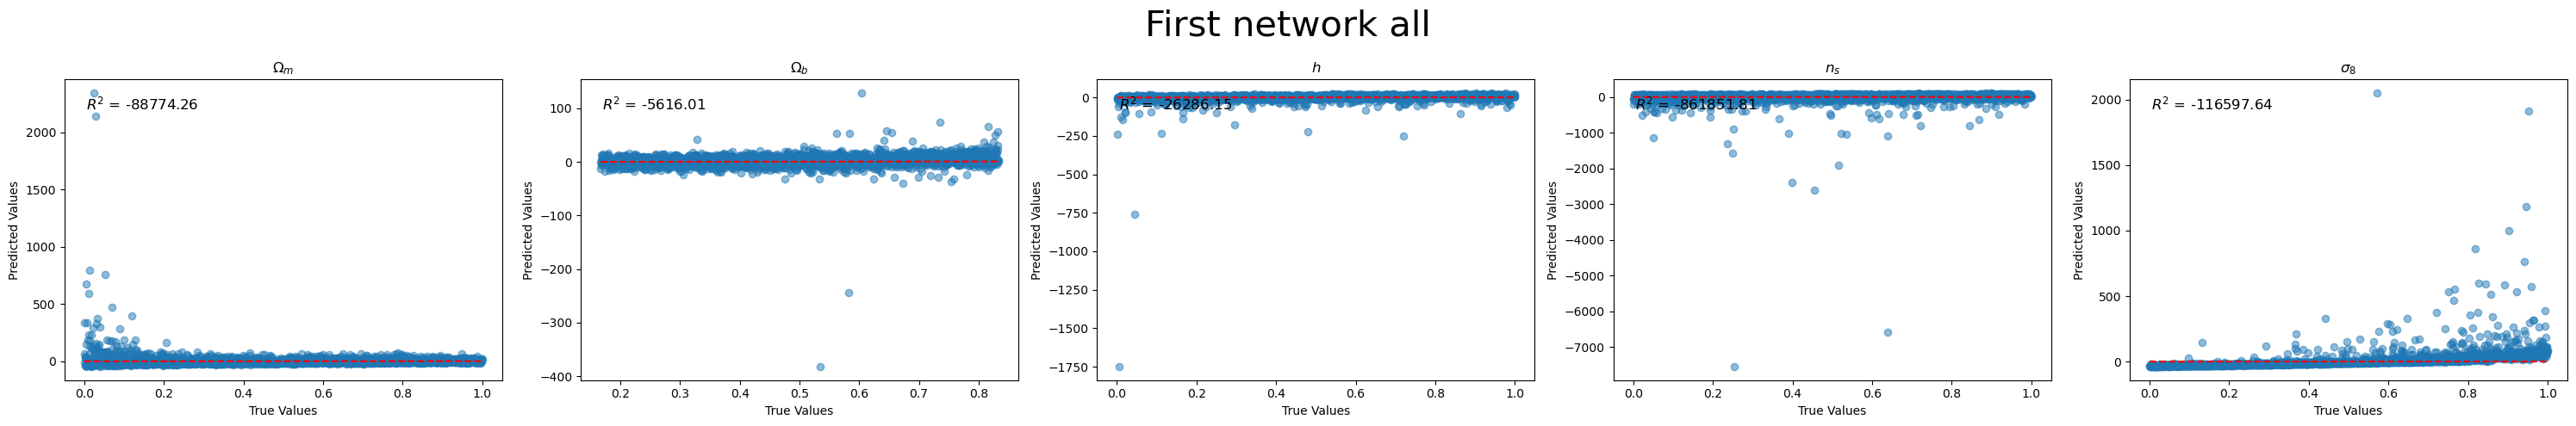

In [4]:
fig, axes = plt.subplots(1, num_params, figsize=(30, 5))

for col in range(num_params):
    ax = axes[col]
    ax.scatter(truths[:, col], preds[:, col], alpha=0.5)
    ax.plot([truths[:, col].min(), truths[:, col].max()], [truths[:, col].min(), truths[:, col].max()], 'r--')
    ax.set_title(f'{param_names[col]}')
    ax.set_xlabel('True Values')
    ax.set_ylabel('Predicted Values')
    r2 = r2_score(truths[:, col], preds[:, col])
    ax.text(0.05, 0.9, f'$R^2$ = {r2:.2f}', transform=ax.transAxes, fontsize=12)
    # ax.set_ylim (0, 10)
plt.suptitle('First network all', size = 30)
plt.tight_layout()
# plt.savefig('first_network_output_all.png')
plt.show()


## Debugging

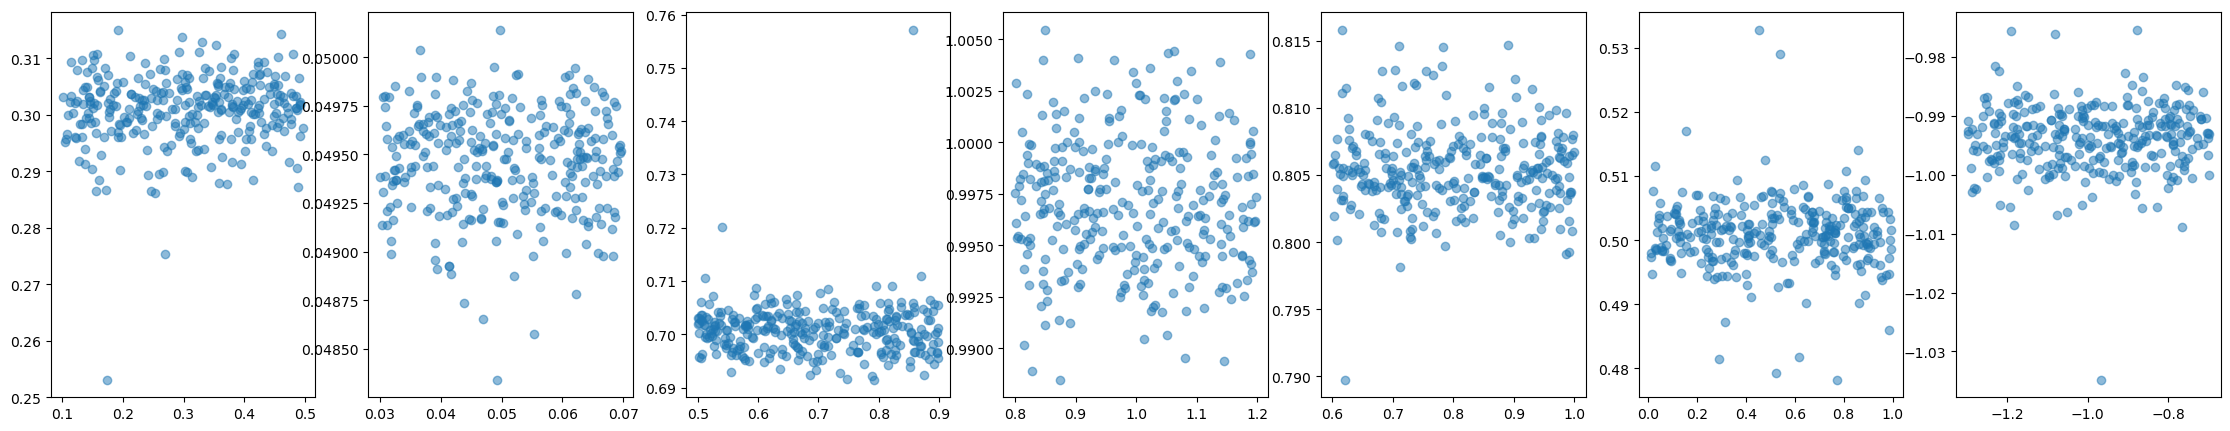

In [7]:
fig, axes = plt.subplots(1, 7, figsize=(28, 5))
for i in range (7):
    ax = axes[i]
    ax.scatter(test_true[:, i], test_predicted[:, i], alpha=0.5)
plt.show()

In [36]:
print(np.min(train_true, axis = 0))
print(np.min(test_true, axis = 0))
print(np.min(valid_true, axis = 0))

[0.00025 0.00075 0.00075 0.00075 0.00075 0.00025 0.00025]
[0.00125 0.00225 0.00025 0.00175 0.00275 0.00125 0.00575]
[0.00475 0.00025 0.00175 0.00025 0.00025 0.00475 0.00175]


In [37]:
print(np.max(train_true, axis = 0))
print(np.max(test_true, axis = 0))
print(np.max(valid_true, axis = 0))

[0.99975002 0.99924999 0.99975002 0.99975002 0.99975002 0.99975002
 0.99874997]
[0.99374998 0.99024999 0.99774998 0.99575001 0.99675    0.99374998
 0.99975002]
[0.99725002 0.99975002 0.98624998 0.99675    0.99774998 0.99874997
 0.99475002]


In [39]:
real_params  = np.loadtxt('../real_params/latin_hypercube_params_nwLH.txt')
print(np.min(real_params, axis = 0))
print(np.max(real_params, axis = 0))

[ 0.1001     0.03001    0.5001     0.8001     0.6001     0.0102475
 -1.29985  ]
[ 0.4999     0.06999    0.8999     1.1999     0.9999     0.9997525
 -0.70015  ]


# Epoch vs Training and Validation Loss

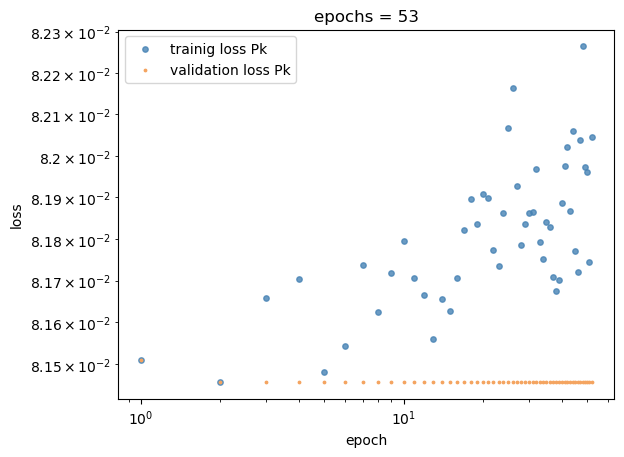

In [11]:
# pk_type = 'Pk_nwLH'   #Pk_nwLH or MPk_nwLH
# num_epochs = 1000
# num_trials = 100
# for i in range (num_trials):
#     loss_file = np.loadtxt('/scratch/network/vk9342/USRP2024/pytorch/'+pk_type+'/'+str(epochs)+'/losses/loss_'+str(i)+'.txt')
#     epoch = loss_file[:, 0]
#     trainig_loss = loss_file[:, 1]
#     validation_loss = loss_file[:, 2]

# plt.scatter(epoch, trainig_loss, label = 'trainig loss Pk', s = 15, alpha = 0.8, color = 'lightskyblue')
# plt.scatter(epoch, validation_loss, label = 'validation loss Pk', s = 3, alpha = 1, color = 'palevioletred')


pk_type = 'Pk_nwLH'   #Pk_nwLH or MPk_nwLH
test_vers = 'transfer_497'
# epochs = 300
study_name = 'Pk_nwLH_params_transfer_497'
storage    = 'sqlite:///nwLH.db'
study = optuna.load_study(study_name=study_name, storage=storage)
best_trial = (study.best_trial).number
# for i in range (num_epochs):
loss_file = np.loadtxt('/scratch/network/vk9342/USRP2024/pytorch/'+pk_type+'/'+str(test_vers)+'/losses/loss_'+str(best_trial)+'.txt')
epoch = loss_file[:, 0]
trainig_loss = loss_file[:, 1]
validation_loss = loss_file[:, 2]

plt.scatter(epoch, trainig_loss, label = 'trainig loss Pk', s = 15, alpha = 0.8, color = 'steelblue')
plt.scatter(epoch, validation_loss, label = 'validation loss Pk', s = 3, alpha = 1, color = 'sandybrown')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.title ('epochs = ' + str(len(epoch)))
plt.show()
